##### Lee, Keinath, Cianfarano and Brandon (2025). Identifying representational structure in CA1 to benchmark theoretical models of cognitive mapping. Neuron 113(2): 307-320. https://doi.org/10.1016/j.neuron.2024.10.027

In this notebook, we will run analyses and generate plots for panels from Figure 4, including simulation of cognitive mapping in the hippocampus according to several models (grid cells, boundary vector cells, place cells, grid-to-place cells, boundary vector-to-place cells, boundary-tethered grid-to-place cells, place-to-successor features, and boundary vector-to-successor features), example rate maps and representational similarity matrices (RSMs) from model results, direct comparison of model RSMs to CA1 data averaged across sequences and within each geometric sequence, along with comparisons of subsets of rate map partitions within and across geometries and the similarity of comparison subsets from model predictions to CA1 data.

First load in all packages and functions for analyses and plotting

In [35]:
from utils import *
from plots import *

Define path where georepca1 folder is located, including dataset manually added to the georepca1/data folder
e.g., r"Users/YourName/Documents/georepca1"

In [36]:
p = r"" # add path to georepca1 folder here
os.chdir(p)

Define list of animal IDs and example animal

In [37]:
animals = ['QLAK-CA1-08', 'QLAK-CA1-30', 'QLAK-CA1-50', 'QLAK-CA1-51', 'QLAK-CA1-56', 'QLAK-CA1-74', 'QLAK-CA1-75']
animal = animals[0]

### Figure 4A 
Simualte Grid cells, Boundary vector, and Place cells (naive model) with RatInABox following observed animal trajectory. These simulated functional cell types will later serve as the "bases" for other models that construct maps from these inputs.

Successfully imported dataset from arrays passed
Total of 2395.5 s of data available


Stepping through updates: 100%|██████████| 71865/71865 [00:17<00:00, 4028.89it/s]


    • To AUTOMATICALLY save all plots (recommended), set  `ratinabox.autosave_plots = True`
    • To MANUALLY save plots, call                        `ratinabox.utils.save_figure(figure_object, save_title).
      This warning will not be shown again


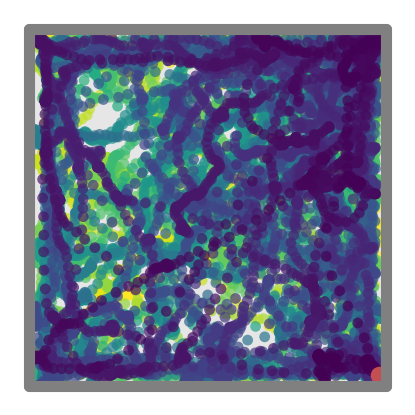

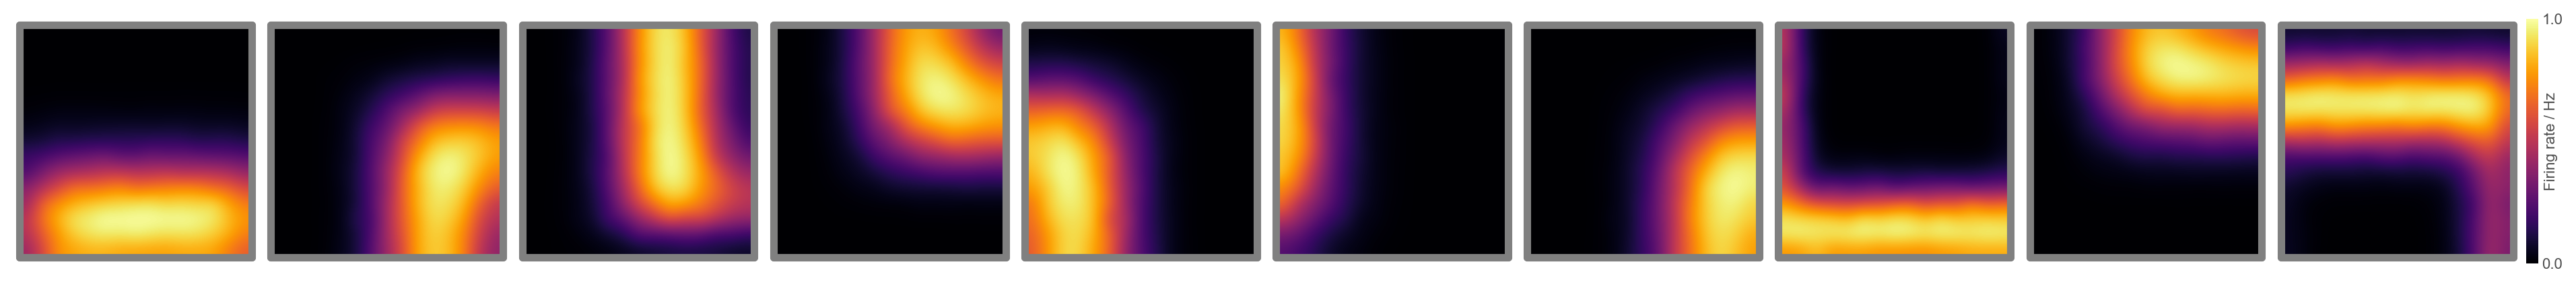

(<Figure size 375x375 with 1 Axes>, <Figure size 3750x375 with 20 Axes>)

In [4]:
plot_riab_example(animal, p)

In [1]:
# simulate model predictions from real animal trajectories using ratinabox
n_features = 200
# simulate and save agent and basis set using ratinabox for target animals
bases = ["GC", "BVC", "PC"]
for basis in bases:
    simulate_bases(animals, p, n_features, bases=[basis])

In [8]:
# build rate maps from simulated bases
for basis in bases:
    get_model_maps(animals, os.path.join(p), feature_types=[basis], compute_rsm=False)

100%|██████████| 31/31 [00:05<00:00,  5.97it/s]


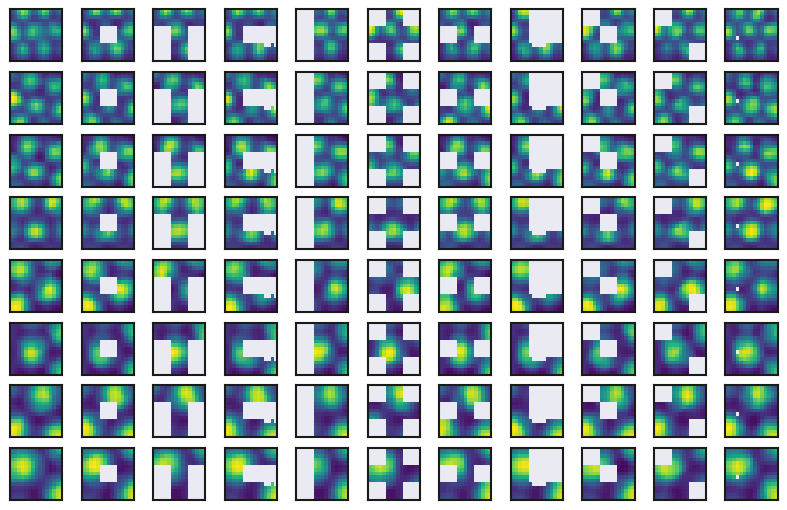

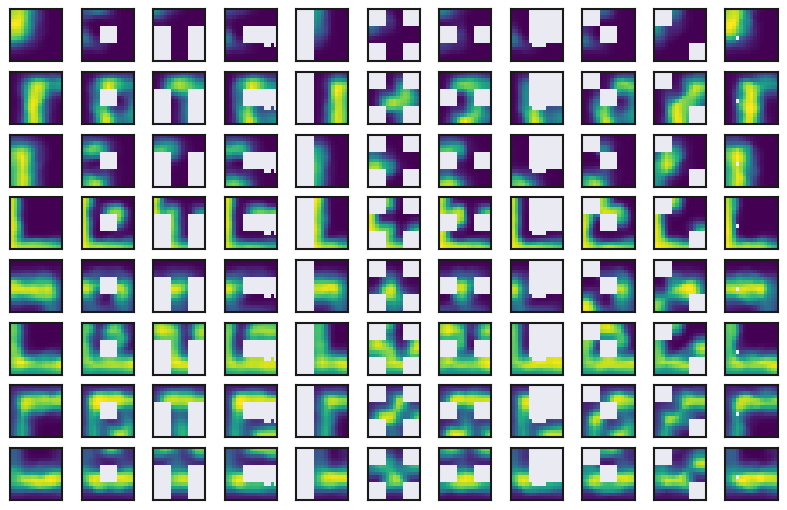

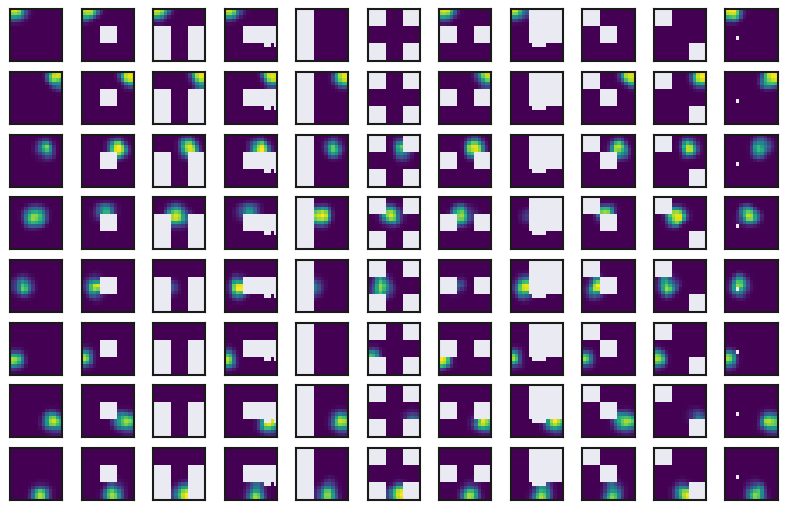

In [4]:
# plot example rate maps from each basis
bases = ["GC", "BVC", "PC"]
for basis in bases:
    basis_maps = joblib.load(os.path.join(p, "results", "riab", f"{animal}_{basis}_maps"))
    example_maps = deepcopy(basis_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
                  unsmoothed=False, make_dir=False, cmap='viridis')

In [10]:
rsm_models_dict = get_model_rsm([animal], p, feature_type='PC')

Correlating partitions of rate maps across days and cell pairs: 200it [19:32,  5.86s/it]


Loaded model RSMs for all animals
Model rsm dictionary created and saved in /Users/jquinnlee/Desktop/georepca1/georepca1/results/riab


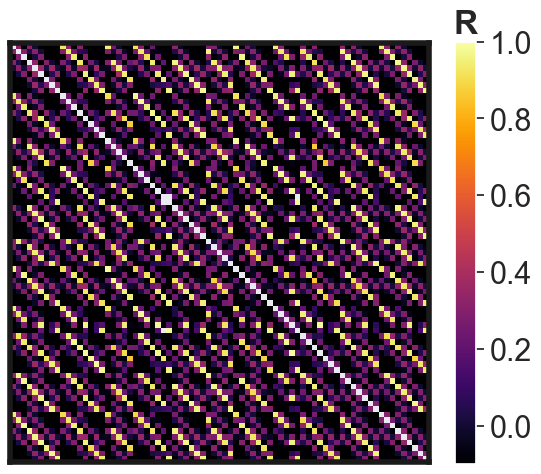

In [5]:
# Build dictionary for model RSM with average results, and plot resulting RSM
get_rsm_model_dict([animal], ["PC"], p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
_ = plot_rsm_parts_averaged(rsm_models["PC"]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

### Figure 4B
Construct PCs from Grid and BV basis set, using methods described in Solstad et al. (2006) and Barry et al. (2006), respectively

In [38]:
pc_rate_maps = get_solstad_pc_population(n_pcs=1000, threshold=True)
joblib.dump(pc_rate_maps, os.path.join(p, "results", "riab", "solstad_gc2pc_receptive_fields_th"))

# example animal without boundary-tethering method
np.random.seed(2023)
pc_receptive_fields = joblib.load(os.path.join(p, "results", "riab", "solstad_gc2pc_receptive_fields_th"))
get_gc2pc_maps([animal], p, pc_receptive_fields, threshold=True, compute_rsm=True)

Simulating place cell rate maps a la Solstad et al. (2006): 100%|██████████| 1000/1000 [04:09<00:00,  4.01it/s]
Generating rate maps from receptive fields across days: 100%|██████████| 31/31 [00:10<00:00,  2.85it/s]
Correlating partitions of rate maps across days and cell pairs: 200it [18:09,  5.45s/it]


In [42]:
get_bt_gc2pc_maps([animal], p, n_pc=200, threshold=True, compute_rsm=True)

Creating boundary fields for all geometries: 100%|██████████| 10/10 [00:08<00:00,  1.13it/s]
Creating shifted receptive fields for each boundary condition and environment: 100%|██████████| 10/10 [00:00<00:00, 3268.12it/s]
Creating boundary-tethered rate maps: 100%|██████████| 31/31 [00:13<00:00,  2.33it/s]
Correlating partitions of rate maps across days and cell pairs: 200it [29:00,  8.70s/it]

Done.


In [8]:
get_bvc2pc_maps(animal, p, nPCs=200, compute_rsm=True)

Computing PC rate maps from model BVC rate maps


Fitting model cell wise across days: 100%|██████████| 31/31 [00:00<00:00, 375.81it/s]
Correlating partitions of rate maps across days and cell pairs: 200it [20:03,  6.02s/it]

--- 1203.2092142105103 seconds ---


### Figure 4B (continued)
Construct a boundary-tethered version of grid cells, as in Keinath et al. (2018)

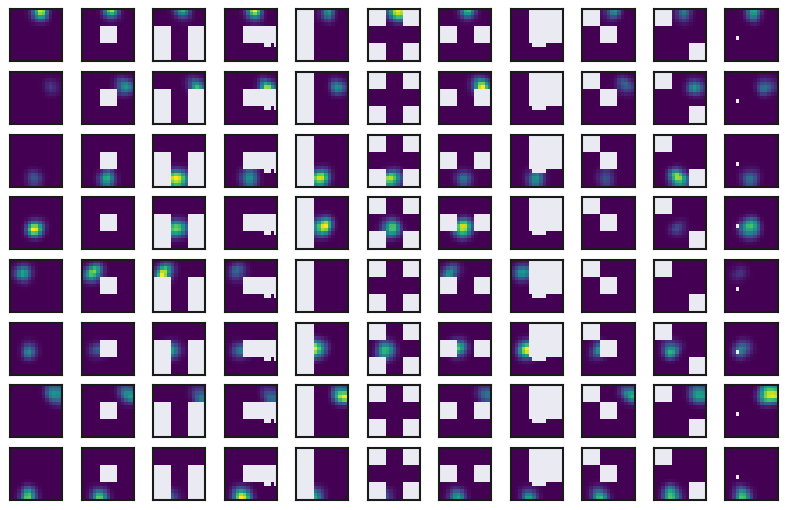

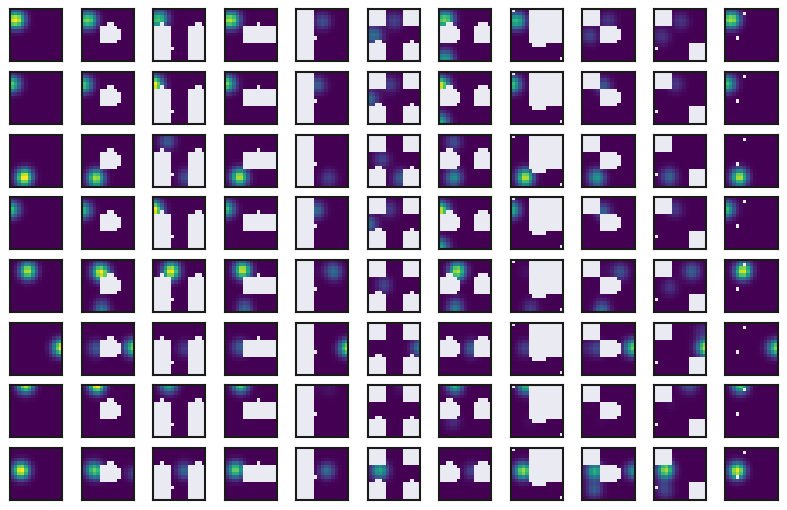

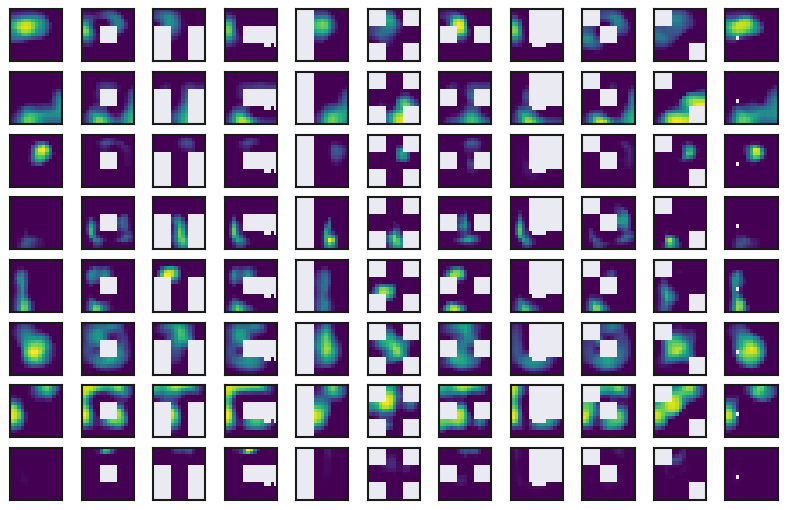

In [43]:
model_PCs = ["GC2PC_th", "bt_GC2PC_th", "BVC2PC"]
for model in model_PCs:
    model_maps = joblib.load(os.path.join(p, "results", "riab", f"{animal}_{model}_maps"))
    example_maps = deepcopy(model_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
              unsmoothed=False, make_dir=False, cmap='viridis')

Loaded model RSMs for all animals
Loaded model RSMs for all animals
Loaded model RSMs for all animals
Model rsm dictionary created and saved in /Users/jquinnlee/Desktop/georepca1/georepca1/results/riab


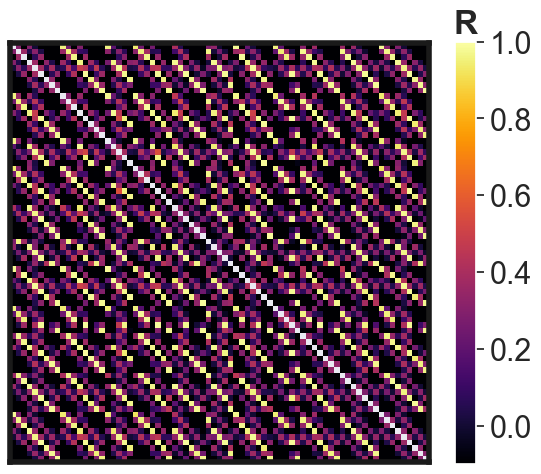

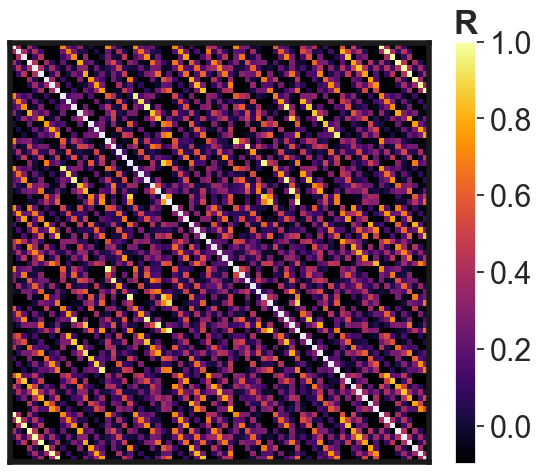

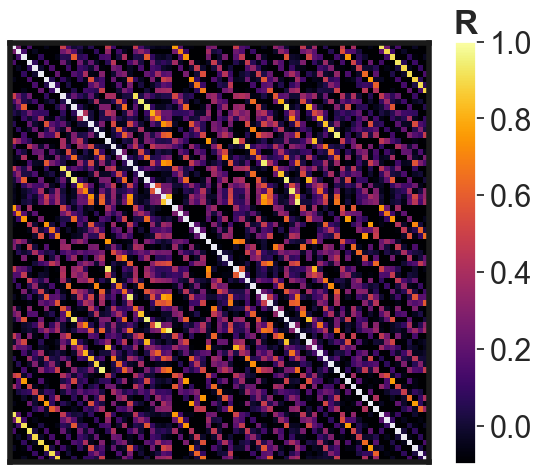

In [44]:
# Build dictionary for model RSM with average results, and plot resulting RSM
get_rsm_model_dict([animal], model_PCs, p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
for model in model_PCs:
    _ = plot_rsm_parts_averaged(rsm_models[model]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

### Figure 4B (continued pt. 2)
Next, model place cells as sucessor features, built either from PC basis (George et al., 2024), or BVC basis (de Cothi et al., 2019)

In [5]:
bases = ["PC", "BVC"]
sr_gamma=0.999
sr_alpha=(50./30.)*10**(-3)
for basis in bases:
    simulate_basis2sf([animal], p, basis, sr_gamma, sr_alpha)

QLAK-CA1-08 set loaded
Successor representation initialized


Pre-training SF from PC inputs on first square day: 100%|██████████| 3/3 [00:43<00:00, 14.45s/it]
Computing successor features from PC inputs across all sessions: 100%|██████████| 31/31 [10:48<00:00, 20.94s/it]


--- 696.4221677780151 seconds ---
QLAK-CA1-08 set loaded
Successor representation initialized


Pre-training SF from BVC inputs on first square day: 100%|██████████| 3/3 [00:34<00:00, 11.47s/it]
Computing successor features from BVC inputs across all sessions: 100%|██████████| 31/31 [09:46<00:00, 18.92s/it]


--- 624.901927947998 seconds ---


In [10]:
# build rate maps and RSMs from model sucessor features
for basis in bases:
    feature_type = f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"
    get_model_maps([animal], p, feature_types=[feature_type], compute_rsm=True)

100%|██████████| 31/31 [00:05<00:00,  6.06it/s]
Correlating partitions of rate maps across days and cell pairs: 200it [17:10,  5.15s/it]
100%|██████████| 31/31 [00:05<00:00,  6.16it/s]
Correlating partitions of rate maps across days and cell pairs: 200it [30:30,  9.15s/it]


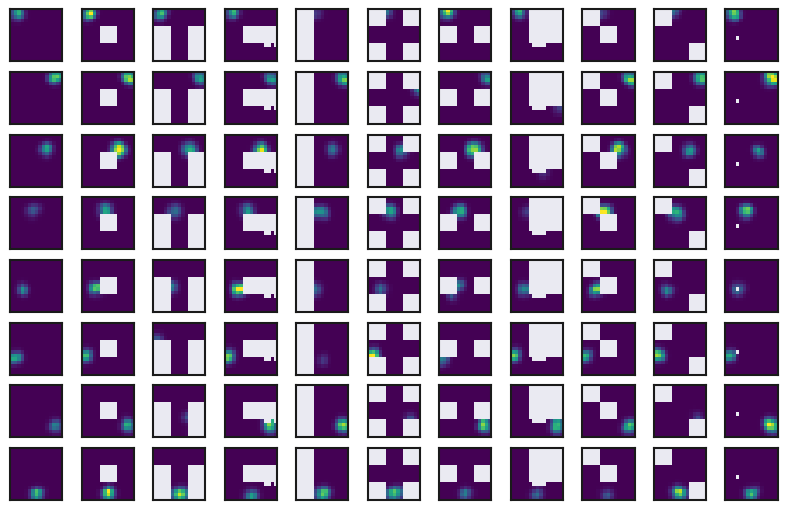

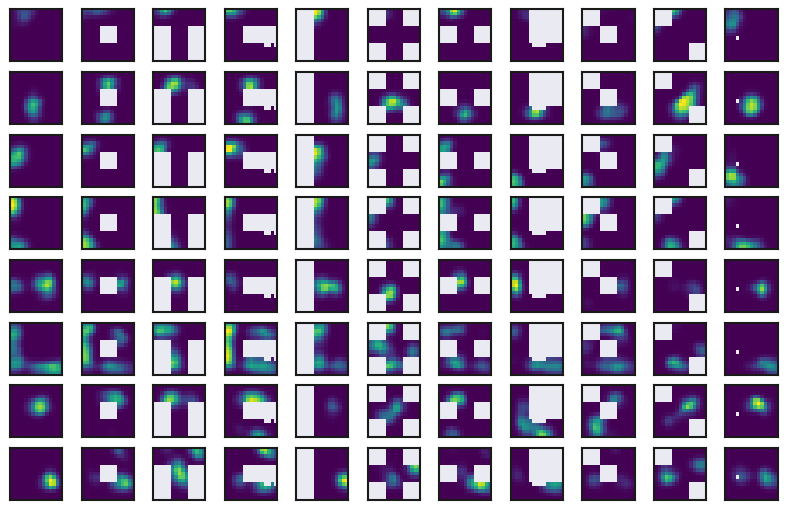

In [9]:
for basis in bases:
    feature_type = f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"
    model_maps = joblib.load(os.path.join(p, "results", "riab", f"{animal}_{feature_type}_maps"))
    example_maps = deepcopy(model_maps)
    example_cells_idx = np.arange(1,200,25)
    example_days_idx = np.arange(20, 31)
    example_maps["smoothed"] = example_maps["smoothed"][:, :, example_cells_idx, :][:, :, :, example_days_idx]
    _ = plot_maps(example_maps, animal,  p, False, example_cells_idx,
              unsmoothed=False, make_dir=False, cmap='viridis')

Loaded model RSMs for all animals
Loaded model RSMs for all animals
Model rsm dictionary created and saved in /Users/jquinnlee/Desktop/georepca1/georepca1/results/riab


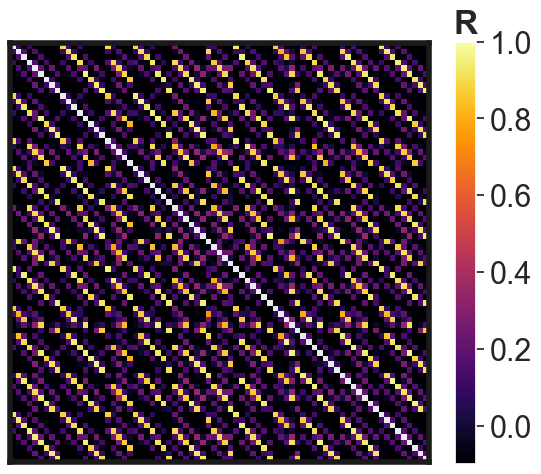

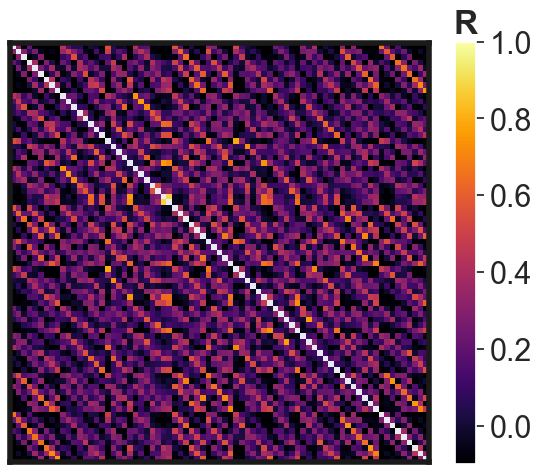

In [45]:
# Build dictionary for model RSM with average results, and plot resulting RSM
feature_types = [f"{basis}2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha" for basis in bases]
get_rsm_model_dict([animal], feature_types, p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))
for feature_type in feature_types:
    _ = plot_rsm_parts_averaged(rsm_models[feature_type]["averaged"], vmin=-.1, vmax=1., cmap="inferno")

### Figure 4D
Measure the similarity of model-based RSM predictions to average CA1 RSM

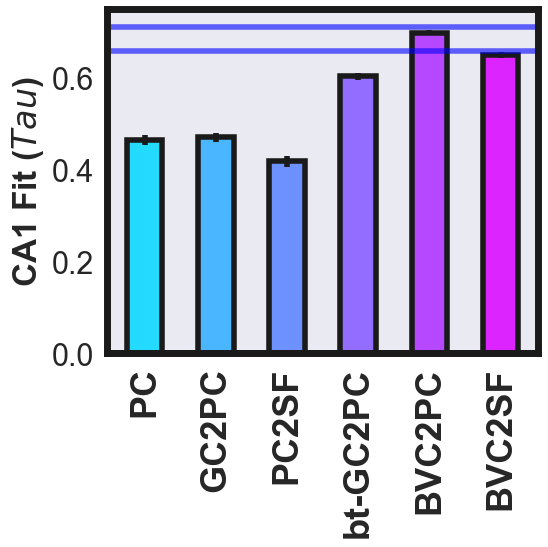

In [50]:
# Measure and plot fit (Kendall's Tau) between model RSM results and actual CA1 data
feature_types = ["PC", "GC2PC_th", f"PC2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha", "bt_GC2PC_th", "BVC2PC",
                 f"BVC2SF_{sr_gamma:.5f}gamma_{sr_alpha:.5f}alpha"]
feature_names = ["PC", "GC2PC", "PC2SF", "bt-GC2PC", "BVC2PC", "BVC2SF"]

get_rsm_model_dict(animals, feature_types, p_models=os.path.join(p, "results", "riab"))
rsm_models = joblib.load(os.path.join(p, "results", "riab", "rsm_models"))

# Load the rsm computed from actual data
rsm_parts_animals = get_rsm_partitioned_sequences(animals, p)
rsm_parts_ordered, rsm_parts_averaged = get_rsm_partitioned_similarity(rsm_parts_animals, animals,
                                                                       False, False)
# Compute upper and lower bound of noise ceiling for each animal, use mask is to drop triangle and nans from rsm
noise_margin_agg, rsm_mask_agg = get_noise_margin(rsm_parts_ordered)

# Compute model fits to ca1 data and organize into dataframe for stats and plotting
df_agg_bootstrap = get_ca1_model_fits(rsm_parts_averaged, rsm_models, feature_types)

# Plot model fits
fig_d = plot_model2ca1_similarities(df_agg_bootstrap, noise_margin_agg, feature_names)


### Figure 4F
Measure the similarity of model-based RSM predictions to CA1 RSM for each geometric sequence

Fitting models to aggregate data with bootstrap procedure: 6it [00:08,  1.45s/it]
Fitting models to aggregate data with bootstrap procedure: 6it [00:00,  6.46it/s]


Two-way ANOVA for effect of model on predicting CA1 representation across sequences: 
                          df     sum_sq   mean_sq             F  PR(>F)
C(Model)                 5.0  15.532991  3.106598  35311.811811     0.0
C(Sequence)              2.0   1.088774  0.544387   6187.893109     0.0
C(Model):C(Sequence)    10.0   0.480277  0.048028    545.917188     0.0
Residual              1782.0   0.156774  0.000088           NaN     NaN


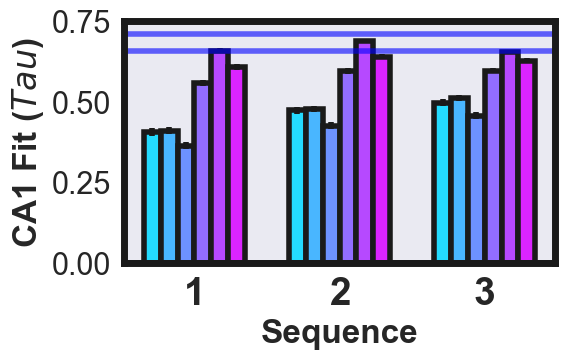

FileNotFoundError: [Errno 2] No such file or directory: '/Users/jquinnlee/Desktop/georepca1/georepca1/Figures/rsm_model_comparison_sequences.svg'

In [51]:
# Measure model fits to CA1 RSM across repetitions of the geometric sequence
df_agg_bootstrap_sequences, n_seq = get_ca1_model_fits_sequences(rsm_parts_ordered, rsm_models, feature_types,
                                                                 feature_names)
# plot results in bar graphs for each sequence
fig_4e = plot_ca1_model_fits_sequences(df_agg_bootstrap_sequences, n_seq, noise_margin_agg)


### Figure 4F
Measure model fits for specific subsets of comparisons: same environment different partitions (SE-DP); different environment same partitions (DE-SP); different environment different partitions (DE-DP)

In [ ]:
df_hypo_comps = get_ca1_model_fit_subsets(rsm_parts_animals, rsm_parts_averaged)
fig_4f = plot_ca1_model_fit_subsets(df_hypo_comps, feature_names)